# SQL - Challenge

## SQLalchemy

In [1]:
# Import Dependancies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from dotenv import load_dotenv
import seaborn as sns
import dataframe_image as dfi

In [2]:
# Import environment variables
load_dotenv()

True

In [3]:
# Connect postgres database
engine = create_engine(f'postgresql://{os.environ.get("credentials")}@localhost:5432/employee_db')
connection = engine.connect()

In [4]:
# Read employee info SQL Query into dataframe
emp_info = pd.DataFrame(connection.execute('select e.emp_no, s.salary, ti.title from employees e join salaries s on s.emp_no = e.emp_no join titles ti on ti.title_id = e.emp_title'))
emp_info.head()

,0,1,2
0,57444,48973,Engineer
1,13616,40000,Senior Engineer
2,240129,43548,Technique Leader
3,427958,63377,Staff
4,35916,40000,Senior Engineer


In [5]:
# Read my info SQL Query into dataframe
my_info = pd.DataFrame(connection.execute('select e.emp_no, s.salary, ti.title from employees e join salaries s on s.emp_no = e.emp_no join titles ti on ti.title_id = e.emp_title where e.emp_no = 499942'))
my_info

,0,1,2
0,499942,40000,Technique Leader


In [6]:
# Restore MetaData to Employee Info
col = {0:'Employee Number',1:'Salary',2:'Title'}
emp_info.rename(columns=col,inplace=True)
emp_info.head()

,Employee Number,Salary,Title
0,57444,48973,Engineer
1,13616,40000,Senior Engineer
2,240129,43548,Technique Leader
3,427958,63377,Staff
4,35916,40000,Senior Engineer


In [7]:
# Restore MetaData to My Info
my_info.rename(columns=col,inplace=True)
my_info.head()

,Employee Number,Salary,Title
0,499942,40000,Technique Leader


In [8]:
# Save snap of my info to show the boss
dfi.export(my_info,'../Images/my_info.png')

In [9]:
# Close Connection
connection.close()

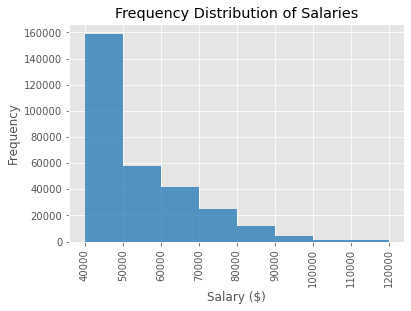

In [10]:
# Make a histogram of employee salaries
bins_list = [40000,50000,60000,70000,80000,90000,100000,120000]
plt.style.use('ggplot')
emp_info.hist('Salary',bins=bins_list,color='tab:blue',alpha=0.75,legend=False)
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title("Frequency Distribution of Salaries")
plt.savefig('../Images/histogram.png',bbox_inches='tight')

In [11]:
# Calculate Average Salaries by Title
avg_sal = emp_info.groupby('Title')['Salary'].mean()
avg_sal

Title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: Salary, dtype: float64

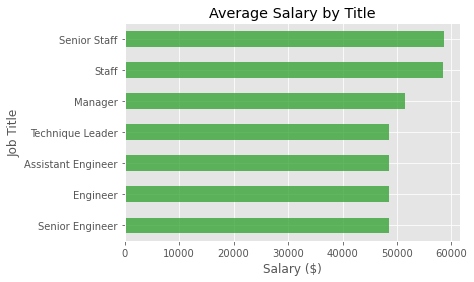

In [12]:
# Plot Average Salaries by Title
plt.style.use('ggplot')
avg_sal.sort_values().plot(kind='barh',color='tab:green',alpha=0.75)
plt.xlabel('Salary ($)')
plt.ylabel('Job Title')
plt.title("Average Salary by Title")
plt.savefig('../Images/avg_sal.png',bbox_inches='tight')

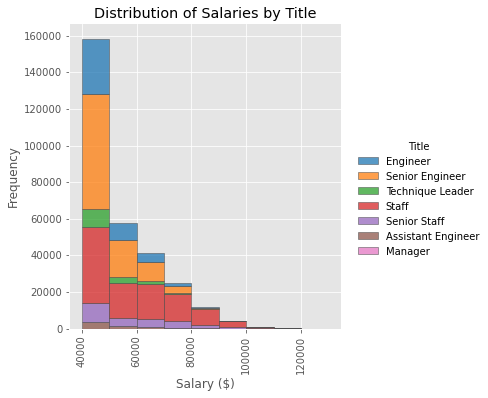

In [13]:
# Make a histgram with job titles highlighted
sns.displot(emp_info,x="Salary", hue="Title",multiple="stack",palette="tab10",
    edgecolor=".3",linewidth=.5,binwidth=10000)
plt.title("Distribution of Salaries by Title")
plt.xticks(rotation=90)
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.savefig('../Images/fancy_hist.png',bbox_inches='tight')

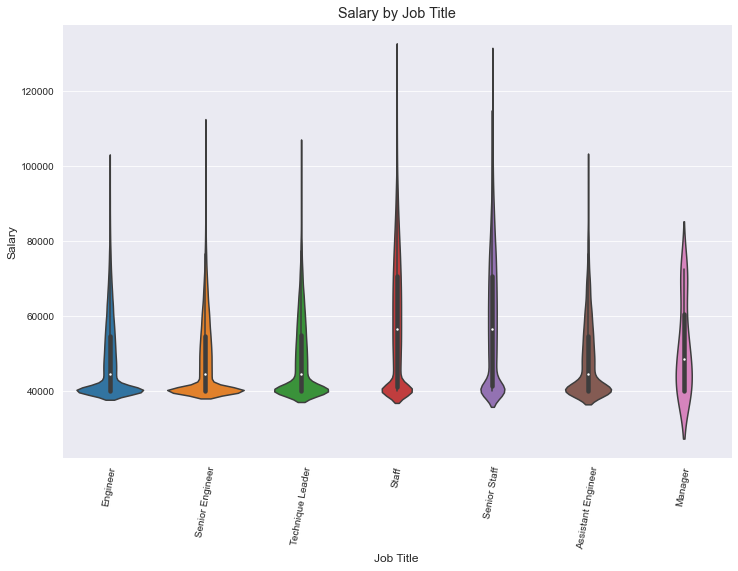

In [14]:
# Make a violin plot
plt.figure(figsize=(12,8))
sns.set_palette("tab10")
sns.set_style("darkgrid")
sns.violinplot(x='Title', y='Salary', data=emp_info)
plt.title("Salary by Job Title")
plt.xticks(rotation=80)
plt.ylabel("Salary")
plt.xlabel("Job Title")
plt.savefig('../Images/violin.png',bbox_inches='tight')
plt.show()

C:\Users\gabri\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


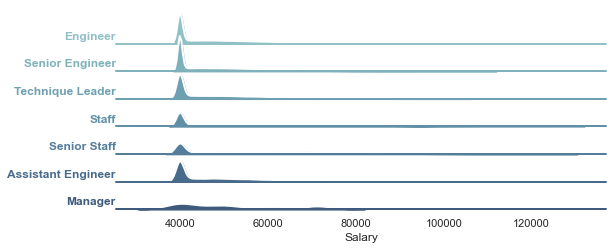

In [15]:
# Messing around with some other plotting techniques

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
df = emp_info

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Title", hue="Title", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Salary",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Salary", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)


g.map(label, "Salary")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)